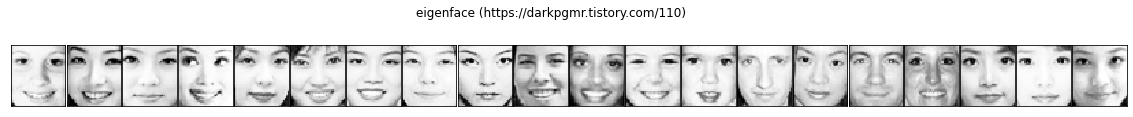

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os 



path_dir = 'C:/Users/kimin/Desktop/eigenface_test' 
file_list = os.listdir(path_dir)
data = []
for file in file_list: 
    img = Image.open(path_dir + '/' + file)
    img = np.array(img, dtype=np.float)[:, :, 0:2]
    img = np.array(img, dtype=np.float).mean(axis=2)/255.
    data.append(img)
    
data = np.array(data)


fig = plt.figure(figsize=(len(data), 2))
fig.suptitle('eigenface (https://darkpgmr.tistory.com/110)')
for i in range(len(data)):
    ax = fig.add_subplot(1, len(data), i+1, xticks=[], yticks=[])
    ax.imshow(data[i], cmap='Greys_r', interpolation='nearest')

plt.subplots_adjust(hspace=0., wspace=0.02)
plt.show()


In [87]:
class PCA: 
    def __init__(self, D):
        n = D.shape[0]
        p = D.shape[1]
        sample_mean = D.mean(axis=0)
        X = D - sample_mean
        U, S, V = np.linalg.svd(X, full_matrices = False)


        orders = np.argsort(-S)
        S = S[orders]
        V = V[orders]
        V = V.transpose()
        print(V.shape)
        self.sample_mean = sample_mean
        self.V = V # orthornoral basis matrix of rowspace(X)
        self.S = S # sigular value of X
        
    def encode(self, D, n_dominant):
        X = D - self.sample_mean
        Vd = self.V[:, 0:n_dominant]
        Cd =  X @ Vd
        return Cd
    
    def decode(self, Cd, n_dominant):
        Vd = self.V[:, 0:n_dominant]
        X_hat_d = Cd @ Vd.transpose()
        D_hat_d = X_hat_d + self.sample_mean
        return D_hat_d

    
dshape = data[0].shape
D = data.reshape(len(data), -1)
pca = PCA(D)


(1800, 20)


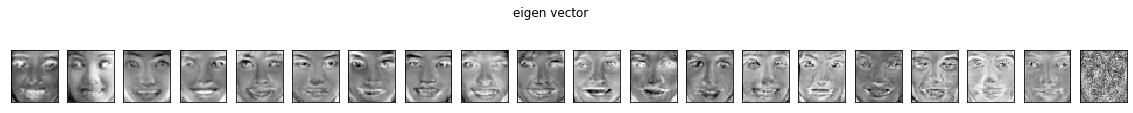

In [88]:
fig = plt.figure(figsize=(len(data), 2))
fig.suptitle('eigen vector')
for i in range(len(data)):
    ax = fig.add_subplot(1, len(data), i+1, xticks=[], yticks=[])
    ax.imshow(pca.V[0:, i].reshape(dshape), cmap='Greys_r', interpolation='nearest')
plt.show()

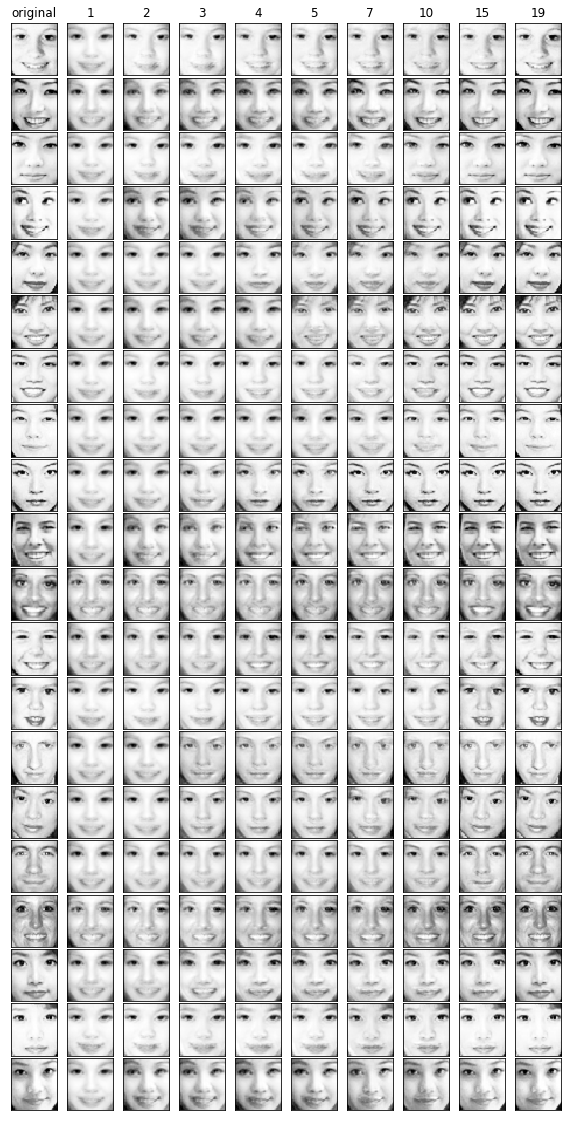

In [89]:

index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
component = [0, 1, 2, 3, 4, 5, 7, 10, 15, 19]
n_data = len(index)
n_col = len(component)

fig = plt.figure(figsize=(n_col, n_data))



ax = fig.add_subplot(n_data, n_col, 1, xticks=[], yticks=[])
ax.set_title('original')
ax.imshow(data[index[0]].reshape(dshape), cmap='Greys_r', interpolation='nearest')
for i in range(1, n_col):
    ax = fig.add_subplot(n_data, n_col, i+1, xticks=[], yticks=[])
    e = pca.encode(data[index[0]].reshape(-1), n_dominant=component[i])
    d = pca.decode(e, n_dominant=component[i])
    ax.set_title('{}'.format(component[i]))
    ax.imshow(d.reshape(dshape), cmap='Greys_r', interpolation='nearest')

for k in range(1, len(index)):
    ax = fig.add_subplot(n_data, n_col, k * n_col + 1, xticks=[], yticks=[])
    ax.imshow(data[index[k]].reshape(dshape), cmap='Greys_r', interpolation='nearest')
    for i in range(1, n_col):
        ax = fig.add_subplot(n_data, n_col,  k * n_col + i+1, xticks=[], yticks=[])
        e = pca.encode(data[index[k]].reshape(-1), n_dominant=component[i])
        d = pca.decode(e, n_dominant=component[i])
        ax.imshow(d.reshape(dshape), cmap='Greys_r', interpolation='nearest')



plt.subplots_adjust(hspace=0.04, wspace=0.04)
plt.show()
